# Testing dataset loading

This notebook contains code that run the pipeline we have created to analyze a set of datasets.

In [1]:
# adding the project root inside the python path
import sys
import os

sys.path.insert(0, os.path.abspath('..'))

In [2]:
# The path where the dataset are stored
DATASET_PATH: str = "../../dataset/first_disease_sel/"
DISEASE_COLNAME: str = 'DISEASE'

In [3]:
from analysis.dataset import load_datasets, compute_ds_col_intersection, clean_datasets, build_dataset, scale_minmax, compute_outlier, split_train_test

### Load datasets

In [4]:
# Load dataset
datasets = load_datasets(DATASET_PATH)
# compute intersection
colname_intersection = compute_ds_col_intersection(datasets)
# clean datasets
datasets = clean_datasets(datasets, colname_intersection)

INFO:root:Inspecting directory ../../dataset/first_disease_sel/GS
INFO:root:Setting disease as GS
INFO:root:Loading file ../../dataset/first_disease_sel/GS/eGSE117146m.csv
INFO:root:Inspecting directory ../../dataset/first_disease_sel/MCM
INFO:root:Setting disease as MCM
INFO:root:Loading file ../../dataset/first_disease_sel/MCM/MCM_GSE149607.csv
INFO:root:Inspecting directory ../../dataset/first_disease_sel/NALD
INFO:root:Setting disease as NALD
INFO:root:Loading file ../../dataset/first_disease_sel/NALD/eGSE85804m.csv
INFO:root:Loading file ../../dataset/first_disease_sel/NALD/eGSE34308m.csv
INFO:root:Loading file ../../dataset/first_disease_sel/NALD/eGSE117647m.csv
INFO:root:Inspecting directory ../../dataset/first_disease_sel/A1A
INFO:root:Setting disease as A1A
INFO:root:Loading file ../../dataset/first_disease_sel/A1A/A1A_deficiency_GSE109516_pbmc.csv
INFO:root:Inspecting directory ../../dataset/first_disease_sel/DIABETE
INFO:root:Setting disease as DIABETE
INFO:root:Loading file

## Outlier detection

In [5]:
compute_outlier(datasets)

INFO:root:Computing outlier detection on dataset...
INFO:root:Computing outlier detection on dataset...
INFO:root:Computing outlier detection on dataset...
INFO:root:Computing outlier detection on dataset...
INFO:root:Computing outlier detection on dataset...
INFO:root:Computing outlier detection on dataset...
INFO:root:Computing outlier detection on dataset...
INFO:root:Computing outlier detection on dataset...
INFO:root:Computing outlier detection on dataset...
INFO:root:Computing outlier detection on dataset...
INFO:root:Computing outlier detection on dataset...
INFO:root:Computing outlier detection on dataset...
INFO:root:Computing outlier detection on dataset...
INFO:root:Computing outlier detection on dataset...
INFO:root:Computing outlier detection on dataset...
INFO:root:Computing outlier detection on dataset...
INFO:root:Computing outlier detection on dataset...
INFO:root:Computing outlier detection on dataset...


## Scaling

In [6]:
scale_minmax(datasets)

## Building unique DS

In [7]:
# finally build the unique dataset
dataset = build_dataset(datasets)
dataset

,TMEM14A,ERAP2,TMEM53,RSRC1,BANF1,PAQR4,THBS1,MAPK9,OSBPL10,CDK9,...,MFN2,RASAL2,ALG13,MFAP3,RBCK1,FHOD1,PCGF1,ZHX3,KSR1,TSPAN6
0,0.170195,0.719820,0.521340,0.643039,0.594851,0.832401,0.677235,0.927600,0.544734,0.309740,...,0.326101,0.556184,0.791716,0.888985,0.322819,0.478968,0.353050,0.633290,0.516384,0.714893
1,0.107204,0.076444,0.946651,0.232906,0.539844,0.737146,0.232162,0.408003,0.581686,0.603609,...,0.400093,0.300319,0.010724,0.887698,0.226087,0.406313,0.372972,0.598699,0.742419,0.914755
2,0.473435,0.802864,0.335668,0.731384,0.887560,0.941287,0.711402,0.475313,0.536086,0.231111,...,0.348198,0.631467,0.294749,0.000000,0.705880,0.760150,0.418860,0.442495,0.807626,0.928301
3,0.505647,0.778817,0.622763,0.988021,0.812823,0.899243,0.724820,0.601473,0.519466,0.353652,...,0.345185,0.226030,0.411528,0.919886,0.318604,0.730142,0.074524,1.000000,0.865848,0.569769
4,0.106171,0.812487,0.845965,0.000000,0.718971,0.658183,0.969617,0.179391,0.494522,0.177919,...,0.624044,0.505492,0.374582,0.987537,0.636127,0.477869,0.477386,0.883860,0.995692,0.703407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.594982,0.379078,0.162162,0.862568,0.004149,0.092593,0.283992,0.940594,0.318519,0.503571,...,0.307545,0.214286,1.000000,0.406321,0.178832,0.258586,0.677083,0.552632,0.558541,0.175000
395,1.000000,0.328009,0.270270,0.131103,0.941909,0.092593,0.154052,0.257426,0.162963,0.108929,...,0.095366,0.000000,0.395315,0.749436,0.218066,0.210101,0.000000,0.565789,0.184261,0.325000
396,0.534050,0.617998,0.567568,0.155515,1.000000,0.685185,0.009377,0.480198,0.240741,0.437500,...,0.207200,0.285714,0.200586,0.316027,0.382299,0.230303,0.885417,0.789474,0.310940,0.450000
397,0.354839,0.018223,0.378378,0.136528,0.721992,0.648148,0.004019,0.153465,0.218519,0.001786,...,0.087323,0.071429,0.226940,0.537246,0.165146,0.270707,0.635417,0.934211,0.253359,0.350000


## Inspecting dataset we have built

In [8]:
dataset['DISEASE']

0           GS
1           GS
2           GS
3           GS
4           GS
        ...   
394    DIABETE
395    DIABETE
396    DIABETE
397    DIABETE
398    DIABETE
Name: DISEASE, Length: 399, dtype: object

DIABETE    176
A1A        128
NALD        38
GS          29
MCM         28
Name: DISEASE, dtype: int64


<AxesSubplot:>

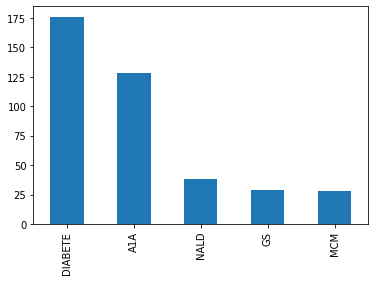

In [9]:
# plotting the number of sample for each disease
disease = dataset['DISEASE'].value_counts()
print(disease)
disease.plot.bar()

# Splitting Dataset

Split dataset into train and test set

In [ ]:
splitted_ds = split_train_test(train=.75, test=.25, dataset=dataset)